<a href="https://colab.research.google.com/github/ToobaAhmedAlvi/Data-science/blob/main/CVAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install PyPDF2


     |████████████████████████████████| 77 kB 3.0 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=d5ac0cbd1e2c659700c379bcc512cb7390487091e2ff33b9920a01ef41b055ef
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [2]:
!pip3 install textract
!pip3 install re

     |████████████████████████████████| 106 kB 15.2 MB/s 
     |████████████████████████████████| 111 kB 54.6 MB/s 
     |████████████████████████████████| 69 kB 6.2 MB/s 
     |████████████████████████████████| 5.6 MB 37.4 MB/s 
     |████████████████████████████████| 10.1 MB 41.3 MB/s 
     |████████████████████████████████| 32.8 MB 117 kB/s 
     |████████████████████████████████| 103 kB 10.2 MB/s 
     |████████████████████████████████| 2.0 MB 41.1 MB/s 
     |████████████████████████████████| 128 kB 44.0 MB/s 
     |████████████████████████████████| 73 kB 1.1 MB/s 
     |████████████████████████████████| 112 kB 43.4 MB/s 
     |████████████████████████████████| 149 kB 43.4 MB/s 
     |████████████████████████████████| 70 kB 6.9 MB/s 
     |████████████████████████████████| 339 kB 51.2 MB/s 
  Created wheel for textract: filename=textract-1.6.4-py3-none-any.whl size=22889 sha256=85c98422fb8b659bb9c4c70db8908946efb1f420fa4e45869931d811f0659df7
  Stored in directory: /root/.cache/pip

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [9]:
import PyPDF2
import textract
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Open pdf file
#pdfFileObj = open('Hamza.pdf','rb')
pdfFileObj = open('Khawaja Aqil Ahmed Resume.pdf','rb')

# Read file
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# Get total number of pages
num_pages = pdfReader.numPages

# Initialize a count for the number of pages
count = 0

# Initialize a text empty etring variable
text = ""

# Extract text from every page on the file
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [10]:
# Convert all strings to lowercase
text = text.lower()

# Remove numbers
text = re.sub(r'\d+','',text)

# Remove punctuation
text = text.translate(str.maketrans('','',string.punctuation))

In [11]:
terms = {'Quality/Six Sigma':['black belt','capability analysis','control charts','doe','dmaic','fishbone',
                              'gage r&r', 'green belt','ishikawa','iso','kaizen','kpi','lean','metrics',
                              'pdsa','performance improvement','process improvement','quality',
                              'quality circles','quality tools','root cause','six sigma',
                              'stability analysis','statistical analysis','tqm'],      
        'Operations management':['automation','bottleneck','constraints','cycle time','efficiency','fmea',
                                 'machinery','maintenance','manufacture','line balancing','oee','operations',
                                 'operations research','optimization','overall equipment effectiveness',
                                 'pfmea','process','process mapping','production','resources','safety',
                                 'stoppage','value stream mapping','utilization'],
        'Supply chain':['abc analysis','apics','customer','customs','delivery','distribution','eoq','epq',
                        'fleet','forecast','inventory','logistic','materials','outsourcing','procurement',
                        'reorder point','rout','safety stock','scheduling','shipping','stock','suppliers',
                        'third party logistics','transport','transportation','traffic','supply chain',
                        'vendor','warehouse','wip','work in progress'],
        'Project management':['administration','agile','budget','cost','direction','feasibility analysis',
                              'finance','kanban','leader','leadership','management','milestones','planning',
                              'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders'],
        'Data analytics':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
        'Healthcare':['adverse events','care','clinic','cphq','ergonomics','healthcare',
                      'health care','health','hospital','human factors','medical','near misses',
                      'patient','reporting system']
       }


In [12]:
# Initializie score counters for each area
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
healthcare = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Supply chain':
        for word in terms[area]:
            if word in text:
                supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Project management':
        for word in terms[area]:
            if word in text:
                project +=1
        scores.append(project)
        
    elif area == 'Data analytics':
        for word in terms[area]:
            if word in text:
                data +=1
        scores.append(data)
        
    else:
        for word in terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)

In [13]:
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Project management,8
Supply chain,7
Data analytics,7
Operations management,4
Quality/Six Sigma,1
Healthcare,1


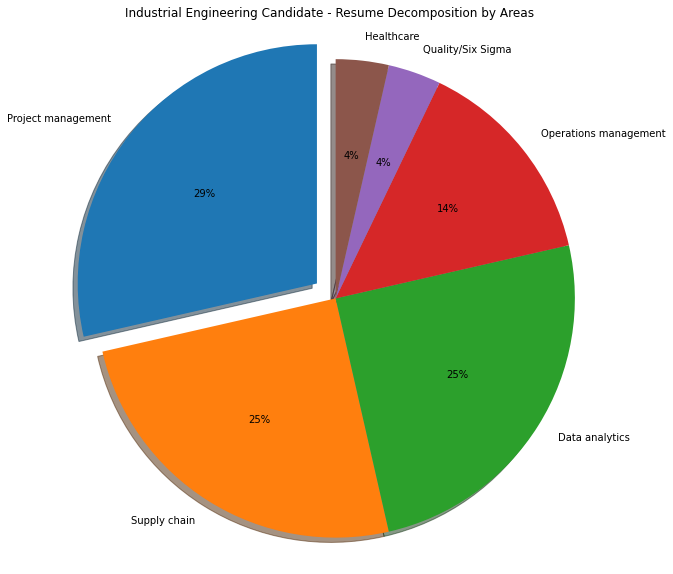

In [14]:
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index, explode = (0.1,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Industrial Engineering Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('resume_screening_results.png')